<a href="https://colab.research.google.com/github/winston-dsouza/Sign-Language-Detection-using-flask/blob/master/batch_fitting_of_original_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL CREATION

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
import os
import math
import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
4/zwFLGDC3y7OzFilwK6MEHPXUbzbh9C47tpTmHcCnv0tB3vFuaL3Kj50# !rm -r /content/content/test
# !rm -r /content/content/validation
# !rm -r /content/content

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
!unzip /content/drive/My\ Drive/file.zip 
!unzip /content/drive/My\ Drive/val.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/validation/68010/00038.jpg  
  inflating: content/validation/68010/00019.jpg  
  inflating: content/validation/68010/00008.jpg  
   creating: content/validation/115080/
  inflating: content/validation/115080/00031.jpg  
  inflating: content/validation/115080/00034.jpg  
  inflating: content/validation/115080/00010.jpg  
  inflating: content/validation/115080/00026.jpg  
  inflating: content/validation/115080/00020.jpg  
  inflating: content/validation/115080/00029.jpg  
  inflating: content/validation/115080/00009.jpg  
  inflating: content/validation/115080/00032.jpg  
  inflating: content/validation/115080/00024.jpg  
  inflating: content/validation/115080/00016.jpg  
  inflating: content/validation/115080/00021.jpg  
  inflating: content/validation/115080/00033.jpg  
  inflating: content/validation/115080/00005.jpg  
  inflating: content/validation/115080/00030.jpg  
  inflating: content/validation/115080/00004.

In [ ]:
targets = pd.read_csv('/content/train-4gestures (2).csv', header=None,sep = ",", names=['', 'values'], index_col=0)['values'].to_dict()
# validation targets, you can use your custome csv file if you already created it with "validation-sample.py"
targets_validation = pd.read_csv('/content/validate-4gestures.csv', header=None,sep = ",", names=['', 'values'], index_col=0)['values'].to_dict()


In [ ]:
# My model
class Conv3DModel(tf.keras.Model):
  def __init__(self):
    super(Conv3DModel, self).__init__()
    # Convolutions
    self.conv1 = tf.compat.v2.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', name="conv1", data_format='channels_last')
    self.pool1 = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), data_format='channels_last')
    self.conv2 = tf.compat.v2.keras.layers.Conv3D(64, (3, 3, 3), activation='relu', name="conv1", data_format='channels_last')
    self.pool2 = tf.keras.layers.MaxPool3D(pool_size=(2, 2,2), data_format='channels_last')
   
    # LSTM & Flatten
    self.convLSTM =tf.keras.layers.ConvLSTM2D(40, (3, 3))
    self.flatten =  tf.keras.layers.Flatten(name="flatten")

    # Dense layers
    self.d1 = tf.keras.layers.Dense(128, activation='relu', name="d1")
    self.out = tf.keras.layers.Dense(4, activation='softmax', name="output")
    

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.convLSTM(x)
    #x = self.pool2(x)
    #x = self.conv3(x)
    #x = self.pool3(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.out(x)

In [ ]:
model = Conv3DModel()
# choose the loss and optimizer methods
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
path = "/content/content/test/"
path_cv = "/content/content/validation/"

dirs = os.listdir(path)
dirs_cv = os.listdir(path_cv)
dirs1,dirs_cv1 = os.listdir(path),os.listdir(path_cv)
for i in range(0, len(dirs)): 
    dirs1[i]=int(dirs[i])
for j in range(0, len(dirs_cv)): 
    dirs_cv1[j]=int(dirs_cv[j])

# print(dirs)
# print(dirs_cv)

n = [0] * (max(list(targets.keys()))+10) #Training List maintained to ensure no directory is considered more than once
m = [0] * (max(list(targets_validation.keys()))+10)
print(len(dirs))
print(len(dirs_cv))
print(dirs)
print(dirs_cv)
print(len(n))
print(len(m))

17027
2077
['69590', '29847', '92696', '125777', '64553', '146877', '79522', '6716', '104630', '4532', '130998', '108321', '35471', '121453', '68808', '24037', '21718', '136693', '15297', '57195', '19642', '32743', '125584', '125653', '10867', '23583', '48251', '65060', '17496', '76864', '39185', '38739', '128899', '14251', '31791', '54950', '74846', '4137', '121394', '60125', '26415', '117057', '126152', '146819', '88636', '58394', '77207', '120627', '91248', '139403', '70475', '115894', '73098', '139011', '88621', '34668', '119581', '33173', '98944', '55871', '130505', '138867', '97675', '89232', '55903', '27636', '3871', '29394', '84719', '51528', '67865', '134716', '101550', '75779', '18466', '118632', '59706', '23011', '16714', '130015', '115202', '131491', '137020', '6078', '136041', '130596', '94307', '107813', '146051', '23514', '132107', '38637', '133536', '60892', '77216', '99163', '146949', '38118', '1307', '63438', '106241', '94587', '51340', '46110', '10515', '146196', '13

In [ ]:
#return gray image
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
# Resize frames
def resize_frame(frame):
    frame = img.imread(frame)
    # edges = cv2.Canny(frame,100,200)
    frame = cv2.resize(frame, (64, 64))
    return frame
'''
The videos do not have the same number of frames, here we try to unify.
'''
hm_frames = 30 # number of frames
# unify number of frames for each training
def get_unify_frames(path):
    offset = 0
    # pick frames
    frames = os.listdir(path)
    frames_count = len(frames)
    # unify number of frames 
    if hm_frames > frames_count:
        # duplicate last frame if video is shorter than necessary
        frames += [frames[-1]] * (hm_frames - frames_count)
    elif hm_frames < frames_count:
        # If there are more frames, then sample starting offset
        #diff = (frames_count - hm_frames)
        #offset = diff-1 
        frames = frames[0:hm_frames]
    return frames  

In [ ]:
# The classes (labels) we want to use
targets_name = [
    "Swiping Right",
    "Sliding Two Fingers Left",
    "No gesture",
    "Thumb Up"
    ]

In [ ]:
# l = os.listdir('/content/train')
# print(len(l))
# print(l)
!rm -r /content/train
!rm -r /content/validation1

rm: cannot remove '/content/train': No such file or directory
rm: cannot remove '/content/validation1': No such file or directory


In [ ]:
# cnt=0
# for i in n:
#   if i==1:
#     cnt+=1
# print(cnt)
print(batch_dict)

rm: cannot remove '/content/train': No such file or directory


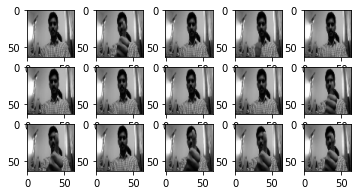

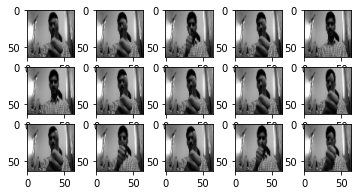

<Figure size 432x288 with 0 Axes>

(3000, 15, 64, 64)
old mean 110.859566
new mean 5.6118434e-08
(3000, 15, 64, 64, 1)
187
(374, 15, 64, 64)
old mean 107.3276
new mean -1.1017828e-08
(374, 15, 64, 64, 1)
(3000, 15, 64, 64, 1)
(3000,)
(374, 15, 64, 64, 1)
(374,)
Epoch 1/2
94/94 [==============================] - 13s 138ms/step - loss: 0.3440 - accuracy: 0.8773 - val_loss: 0.2988 - val_accuracy: 0.8930
Epoch 2/2
94/94 [==============================] - 13s 138ms/step - loss: 0.1619 - accuracy: 0.9457 - val_loss: 0.3473 - val_accuracy: 0.8904


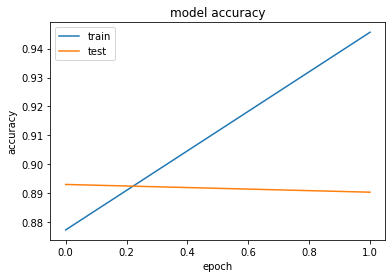

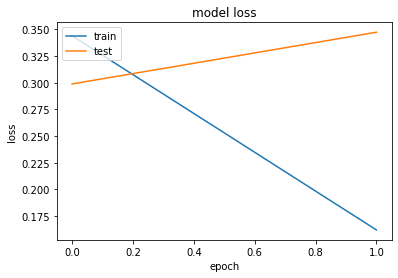

In [ ]:
for iteration in range(5):
  #------------------------------------------------------PROCESSING AND PREPARING THE TRAINING DATA-----------------------------------------------------#

  counter_train = 0
  results_train = []
  batch_dict = {}
  results_train = []
  path = "/content/content/test/"
  dirs = os.listdir(path)
  for k,v in targets.items():
    if counter_train != 1500  and n[k]==0:
      if v=='No gesture' or 'Swiping Right' or 'Sliding Two Fingers Left' or 'Thumb Up':
        for directory in dirs:
          if k == int(directory):
            batch_dict.update({k:v})
            n[k]=1
            results_train.append(k)
            counter_train += 1  
  # print(len(results_train))
  # print(batch_dict)
  !rm -r /content/train

  import shutil
  os.chdir('/content/content/test/')
  path = '/content/content/test/'
  path1= '/content/train/'
  for val in results_train:
      for directory in dirs:
              if val==int(directory):
                  if os.path.isdir(path+directory):
                      shutil.copytree(directory,path1+str(val))

  # Adjust training data
  dirs = os.listdir(path1)
  counter_training = 0 # number of training
  training_targets = [] # training targets 
  new_frames = [] # training data after resize & unify
  for directory in dirs:
      new_frame = [] # one training
      # Frames in each folder
      frames = get_unify_frames(path1+directory)
      if len(frames) == hm_frames: # just to be sure
          for frame in frames:
              frame = resize_frame(path1+directory+'/'+frame)
              new_frame.append(rgb2gray(frame))
              if len(new_frame) == 15: # partition each training on two trainings.
                  new_frames.append(new_frame) # append each partition to training data
                  training_targets.append(targets_name.index(batch_dict[int(directory)]))
                  counter_training +=1
                  new_frame = []


  #show data
  fig = plt.figure()
  for i in range(2,4):
      for num,frame in enumerate(new_frames[i][0:18]):
          y = fig.add_subplot(4,5,num+1)
          y.imshow(frame, cmap='gray')
      fig = plt.figure()
  plt.show()


  # convert training data to np float32
  training_data = np.array(new_frames[0:counter_training], dtype=np.float32)

  #print shape
  print(training_data.shape)



  # Normalisation: training
  print('old mean', training_data.mean())
  scaler = StandardScaler()
  scaled_images  = scaler.fit_transform(training_data.reshape(-1, 15*64*64))
  print('new mean', scaled_images.mean())
  scaled_images  = scaled_images.reshape(-1, 15, 64, 64, 1)
  print(scaled_images.shape)




  #------------------------------------------------------------------------------------------------------------------------------------------------------#




  #------------------------------------------------------PROCESSING AND PREPARING THE VALIDATION DATA-----------------------------------------------------#


  counter_validate = 0
  results_validation = []
  batch_dict_validation = {}
  results_validation = []
  path_cv = "/content/content/validation/"
  dirs_cv = os.listdir(path_cv)
  for k,v in targets_validation.items():
    if counter_validate != 187   and m[k]==0:
      if v=='No gesture' or 'Swiping Right' or 'Sliding Two Fingers Left' or 'Thumb Up':
        for directory in dirs_cv:
          if k == int(directory):
            batch_dict_validation.update({k:v})
            m[k]=1
            results_validation.append(k)
            counter_validate += 1  
  print(len(results_validation))
  !rm -r /content/validation1
  import shutil
  os.chdir('/content/content/validation/')
  path = '/content/content/validation/'
  path1_cv= '/content/validation1/'
  for val in results_validation:
      for directory in dirs_cv:
              if val==int(directory):
                  if os.path.isdir(path+directory):
                      shutil.copytree(directory,path1_cv+str(val))


  # Adjust validation data
  dirs_cv = os.listdir(path1_cv)
  counter_validation = 0
  cv_targets = []
  new_frames_cv = []
  for directory in dirs_cv:
      new_frame = []
      # Frames in each folder
      frames = get_unify_frames(path1_cv+directory)
      if len(frames)==hm_frames:
          for frame in frames:
              frame = resize_frame(path1_cv+directory+'/'+frame)
              new_frame.append(rgb2gray(frame))
              if len(new_frame) == 15:
                  new_frames_cv.append(new_frame)
                  cv_targets.append(targets_name.index(batch_dict_validation[int(directory)]))
                  counter_validation +=1
                  new_frame = []


  # convert validation data to np float32
  cv_data = np.array(new_frames_cv[0:counter_validation], dtype=np.float32)




  #print shape
  print(cv_data.shape)



  # Normalisation: validation
  print('old mean', cv_data.mean())
  scaler = StandardScaler()
  scaled_images_cv  = scaler.fit_transform(cv_data.reshape(-1, 15*64*64))
  print('new mean',scaled_images_cv.mean())
  scaled_images_cv  = scaled_images_cv.reshape(-1, 15, 64, 64, 1)
  print(scaled_images_cv.shape)






  #------------------------------------------------------------------------------------------------------------------------------------------------------#
  #TRANSFER DATA TO NUMPY ARRAYS
  x_train = np.array(scaled_images)
  y_train = np.array(training_targets)
  x_val = np.array(scaled_images_cv)
  y_val = np.array(cv_targets)
  print(x_train.shape)
  print(y_train.shape)
  print(x_val.shape)
  print(y_val.shape)



  # Run the training 
  history = model.fit(x_train, y_train,
                      validation_data=(x_val, y_val),
                      batch_size=32,
                      epochs=2,verbose=1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


  if iteration==9:
    print('Finished')


In [ ]:
model.summary()


Model: "conv3d_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               multiple                  896       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 multiple                  0         
_________________________________________________________________
conv1 (Conv3D)               multiple                  55360     
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 multiple                  0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  multiple                  149920    
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
d1 (Dense)                   multiple               

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(x_val, y_val))
print('Classification Report')
targets_names = [
    "Swiping Right",
    "Sliding Two Fingers Left",
    "No gesture",
    "Thumb Up"
    ]
print(classification_report(v.classes, y_pred, target_names=target_names))


Confusion Matrix


ValueError: ignored

In [ ]:
model.

In [ ]:
model.save_weights('/content/path_to_my_weights(edge2E)', save_format='tf')

In [ ]:
print(batch_dict)
l = os.listdir('/content/train')
print(len(l))

{8050: 'No gesture', 88411: 'No gesture', 101151: 'No gesture', 71483: 'No gesture', 93266: 'No gesture', 140428: 'No gesture', 50250: 'No gesture', 41663: 'No gesture', 818: 'No gesture', 25775: 'No gesture', 118152: 'No gesture', 52457: 'No gesture', 105835: 'No gesture', 128037: 'No gesture', 107833: 'No gesture', 18008: 'No gesture', 49463: 'No gesture', 111442: 'No gesture', 91108: 'No gesture', 126893: 'No gesture', 18101: 'No gesture', 84812: 'No gesture', 99441: 'No gesture', 18299: 'No gesture', 130871: 'No gesture', 52196: 'No gesture', 130307: 'No gesture', 7504: 'No gesture', 9939: 'No gesture', 59609: 'No gesture', 20016: 'No gesture', 134334: 'No gesture', 84937: 'No gesture', 81405: 'No gesture', 48631: 'No gesture', 97516: 'No gesture', 84436: 'No gesture', 81882: 'No gesture', 120986: 'No gesture', 113026: 'No gesture', 122447: 'No gesture', 114839: 'No gesture', 97032: 'No gesture', 80226: 'No gesture', 192: 'No gesture', 33062: 'No gesture', 99680: 'No gesture', 5546

In [ ]:
print(dirs)

['97916', '47487', '51416', '144304', '17278', '70255', '100345', '41824', '40792', '108604', '106806', '3988', '112877', '128004', '109682', '127290', '42067', '114163', '14539', '138188', '67365', '122223', '126454', '39201', '82569', '20026', '135197', '37150', '100637', '651', '65685', '23583', '1393', '103744', '5673', '98059', '100294', '72504', '100195', '52417', '145565', '21514', '4508', '87789', '43013', '51084', '137148', '13099', '32630', '6557', '29211', '77200', '74288', '110020', '75289', '1383', '144145', '20879', '115872', '49399', '81585', '14913', '7387', '37419', '101470', '109660', '121573', '11189', '65221', '57431', '146855', '18704', '44319', '142105', '7559', '37198', '136436', '95546', '60644', '19511', '139566', '33658', '95273', '13521', '72921', '138520', '100262', '55213', '31059', '31681', '82395', '34526', '147602', '29172', '74775', '116222', '125498', '31146', '126907', '85195', '66388', '81824', '119929', '84510', '114832', '59493', '98147', '94131', 

In [ ]:
mv /content/wts/path_to_my_weights\(edge2E\).data-00001-of-00002 /content/drive/My\ Drive/sld/

VALIDATION DATA AND DICTIONARY GENERATION


In [ ]:
counter_validate = 0
results_validation = []
batch_dict_validation = {}
results_validation = []
for k,v in targets_validation.items():
  if counter_validate != 200:
    if v=='No gesture' or 'Swiping Right' or 'Sliding Two Fingers Left' or 'Thumb Up':
      for directory in dirs_cv:
        if k == int(directory) and m[k]==0:
          batch_dict_validation.update({k:v})
          m[k]=1
          results_validation.append(k)
          counter_validate += 1  
print(len(results_validation))

import shutil
os.chdir('/content/20bn-jester-v1/')
path = '/content/20bn-jester-v1/'
path1_cv= '/content/validation/'
for val in results_validation:
    for directory in dirs_cv:
            if val==int(directory):
                if os.path.isdir(path+directory):
                    shutil.copytree(directory,path1_cv+str(val))


# Adjust validation data
dirs_cv = os.listdir(path1_cv)
counter_validation = 0
cv_targets = []
new_frames_cv = []
for directory in dirs_cv:
    new_frame = []
    # Frames in each folder
    frames = get_unify_frames(path1_cv+directory)
    if len(frames)==hm_frames:
        for frame in frames:
            frame = resize_frame(path1_cv+directory+'/'+frame)
            new_frame.append(frame)
            if len(new_frame) == 15:
                new_frames_cv.append(new_frame)
                cv_targets.append(targets_validation.index(batch_dict_validation[int(directory)]))
                counter_validation +=1
                new_frame = []


# convert validation data to np float32
cv_data = np.array(new_frames_cv[0:counter_validation], dtype=np.float32)




#print shape
print(cv_data.shape)



# Normalisation: validation
print('old mean', cv_data.mean())
scaler = StandardScaler()
scaled_images_cv  = scaler.fit_transform(cv_data.reshape(-1, 15*64*64))
print('new mean',scaled_images_cv.mean())
scaled_images_cv  = scaled_images_cv.reshape(-1, 15, 64, 64, 1)
print(scaled_images_cv.shape)

In [ ]:
i = '4'
i = int(i)
print(int(i))

4


In [ ]:
dict1 = {}
for val in results:
  dict1.update( {val : 'Thumb Up'} )
print(len(dict1))

In [ ]:
path = "/content/20bn-jester-v1"
path_cv = "/content/20bn-jester-v1"

dirs = os.listdir(path)
dirs_cv = os.listdir(path_cv)

n = [0] * dirs_cv


results_val = []
for k,v in targets_validation.items():
    if v=='No gesture':
        for directory in dirs:
                if k == int(directory):
                    results.append(k)  
print(len(results))
import shutil
os.chdir('/content/20bn-jester-v1/')
path = '/content/20bn-jester-v1/'
path1= '/content/validation/'
for val in results:
    for directory in dirs:
            if val==int(directory):
                if os.path.isdir(path+directory):
                    shutil.copytree(directory,path1+str(val))